<a href="https://www.kaggle.com/code/easyice/heart-disease-eda-prediction-2-model-91-accuracy?scriptVersionId=240227457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Required Libraries.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # Hyperparameter Tuning.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Feature Scaling.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score

In [60]:
# Load Dataset.
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Basic Data Checks and Summary.

In [61]:
df.shape

(303, 14)

In [62]:
df.size

4242

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [65]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [66]:
# target column 
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [67]:
# null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## E.D.A.

<Axes: ylabel='Density'>

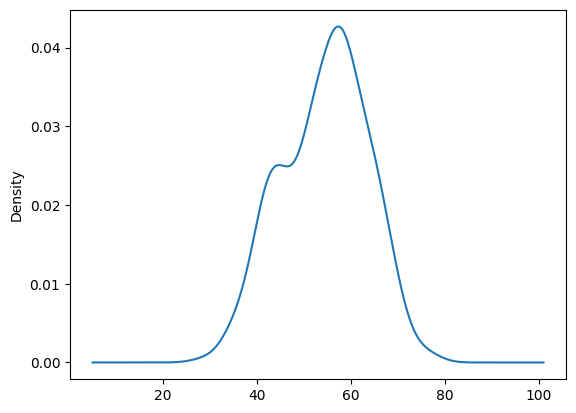

In [68]:
df.age.plot(kind='kde')

Text(0.5, 0, '0 for Female and 1 for Male')

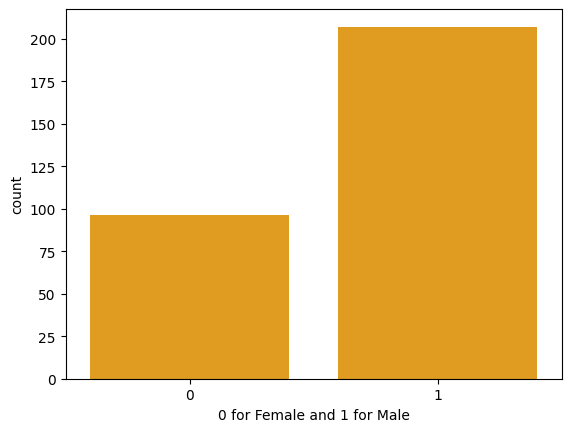

In [69]:
sns.countplot(x='sex', data=df, color='orange')
plt.xlabel("0 for Female and 1 for Male")

<Axes: xlabel='target', ylabel='count'>

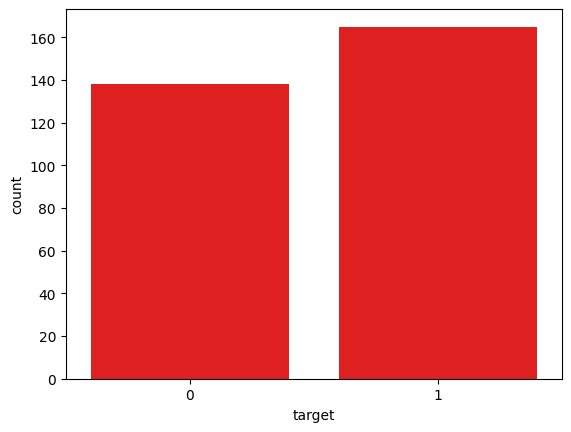

In [70]:
sns.countplot(x='target', data=df, color='r')

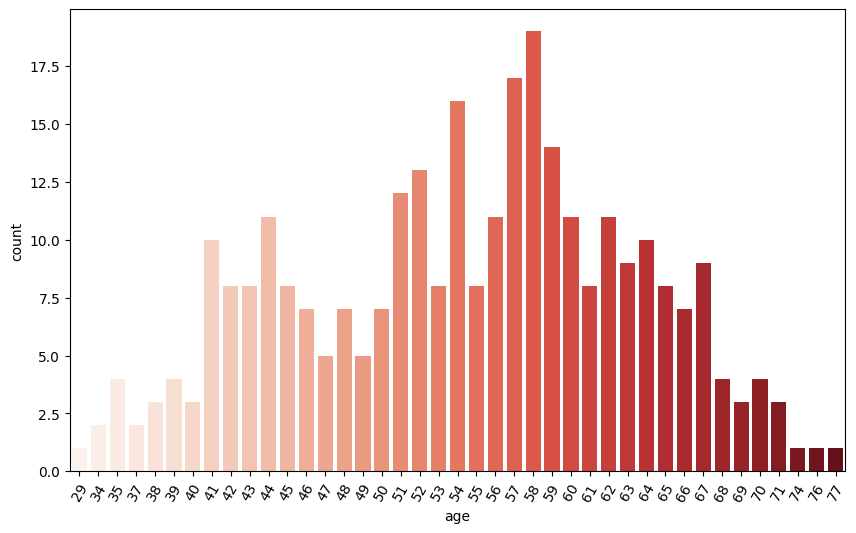

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x='age', data=df, palette='Reds')
plt.xticks(rotation=60);

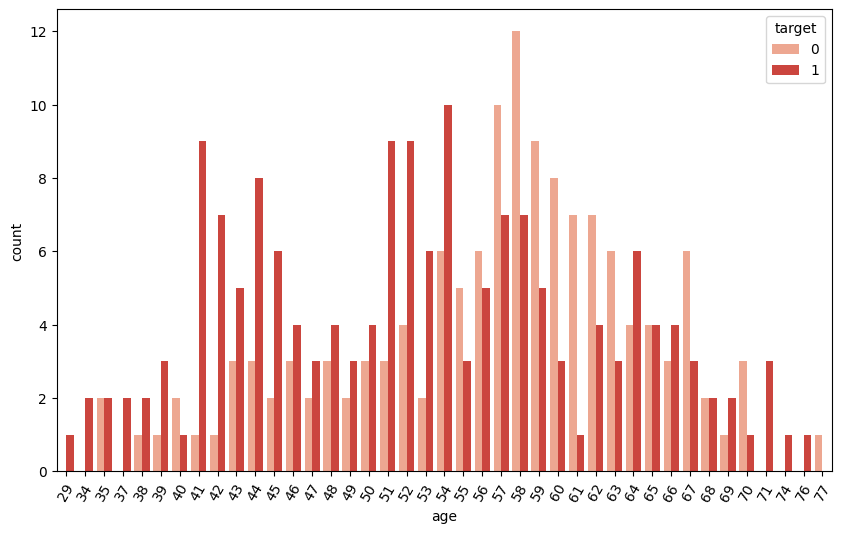

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(x='age', data=df,hue='target', palette='Reds')
plt.xticks(rotation=60);

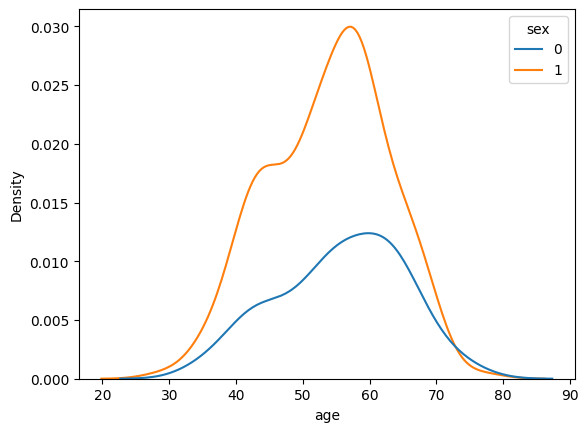

In [73]:
sns.kdeplot(x='age', hue='sex', data = df)
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='age', ylabel='Density'>

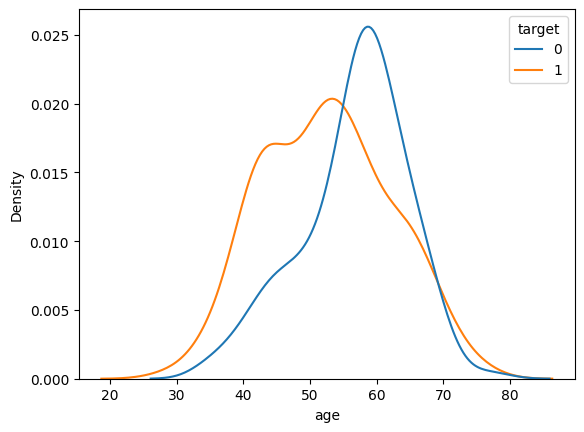

In [74]:
sns.kdeplot(x='age', hue='target', data = df)

<Axes: xlabel='count', ylabel='target'>

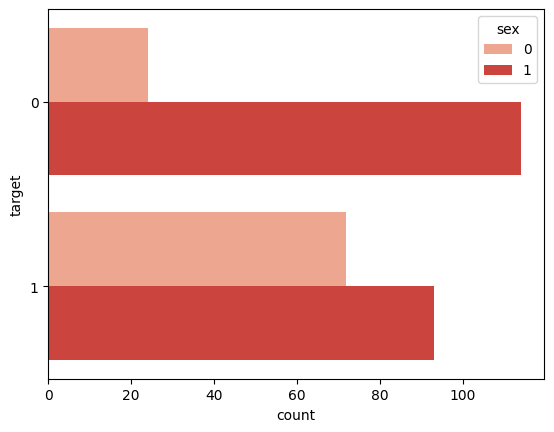

In [75]:
sns.countplot(y='target', hue='sex', data=df, palette='Reds')

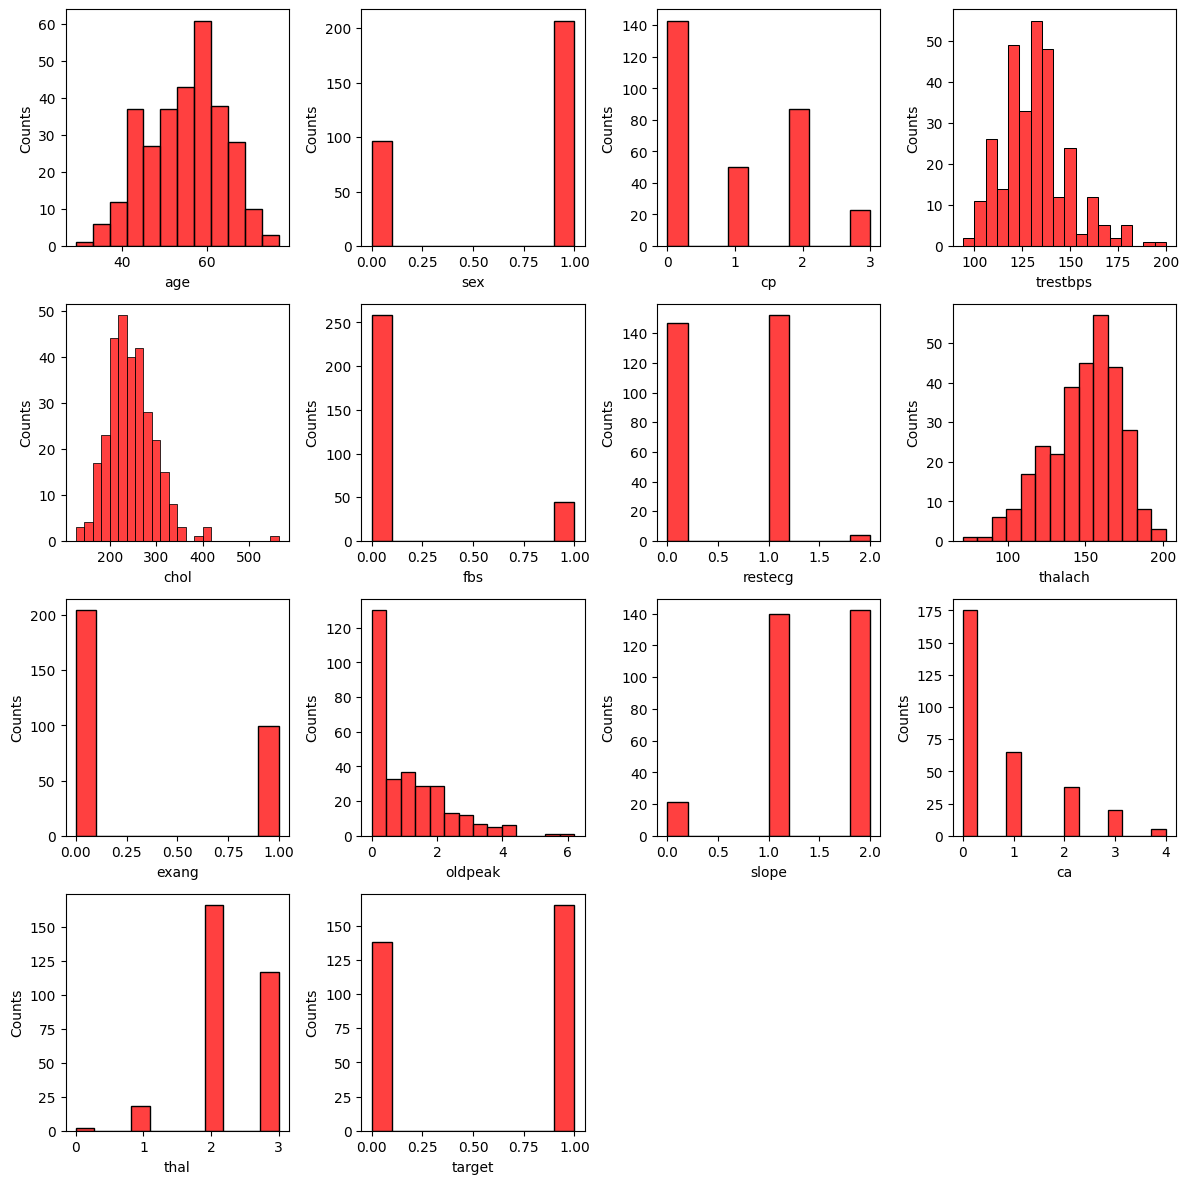

In [76]:
plt.figure(figsize=(12,12))
plotnumber = 1
for column in df:
    if plotnumber <= 14:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(df[column], color = 'Red')
        plt.xlabel(column)
        plt.ylabel('Counts')
    plotnumber+=1
plt.tight_layout()

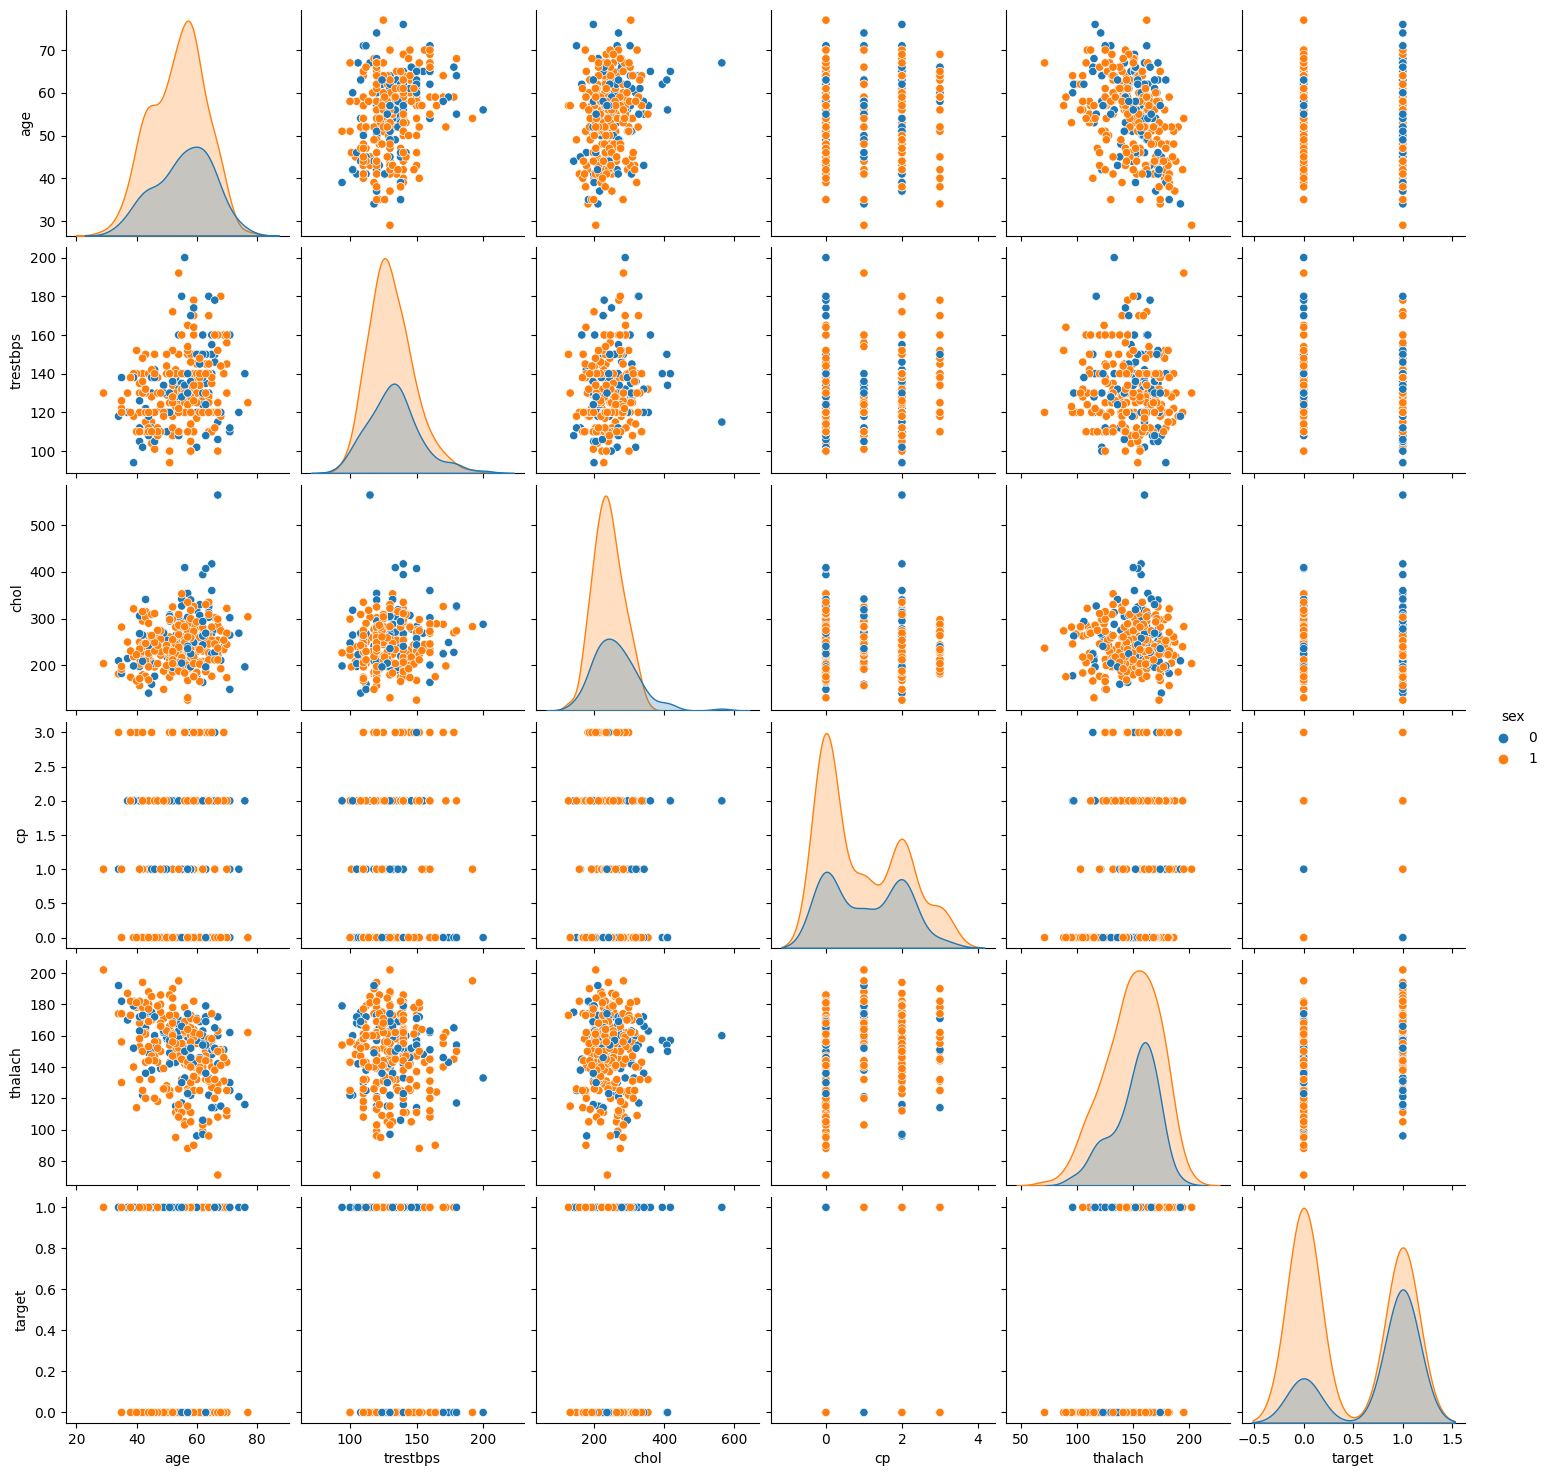

In [77]:
sns.pairplot(df[["age", "sex", "trestbps", "chol", "cp","thalach", "target"]], hue='sex')

In [78]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

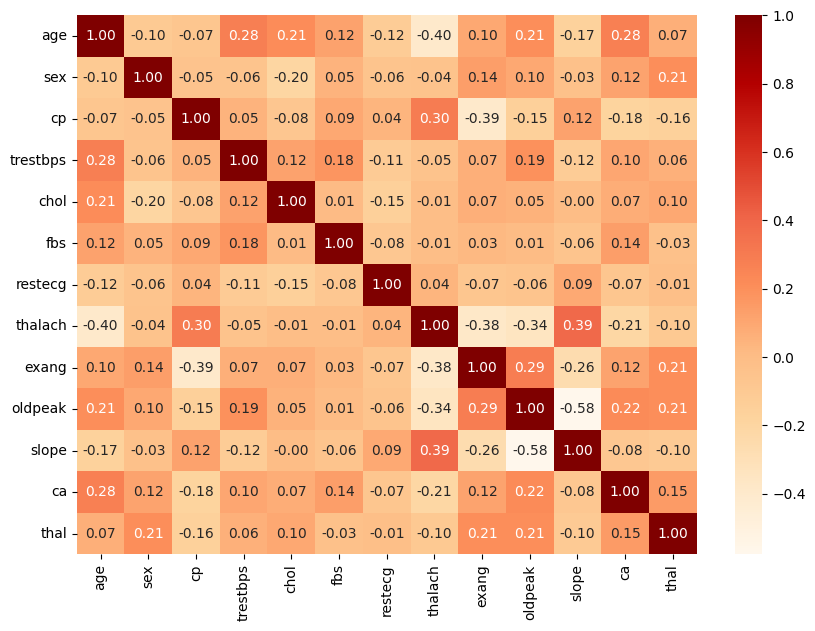

In [79]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, fmt='.2f', cmap='OrRd')

## Train Test Split.

In [80]:
X = df.drop('target', axis=1)
y = df['target']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling.

In [82]:
# MinMax Scaler.

norm_scale = MinMaxScaler()
X_norm = norm_scale.fit_transform(X_train)
X_train_nor_scaled = pd.DataFrame(X_norm, columns = X.columns)

X_test_nor_scaled = pd.DataFrame(norm_scale.transform(X_test), columns = X.columns)

In [83]:
X_test_nor_scaled.shape

(61, 13)

In [84]:
X_train_nor_scaled.shape

(242, 13)

In [85]:
# Standard Scaling.

std_scale = StandardScaler()
X_std = std_scale.fit_transform(X_train)
X_train_std_scaled = pd.DataFrame(X_std, columns = X.columns)

X_std_test = std_scale.transform(X_test)
X_test_std_scaled = pd.DataFrame(X_std_test, columns = X.columns)

In [86]:
X_train_std_scaled.shape

(242, 13)

In [87]:
X_test_std_scaled.shape

(61, 13)

# Model Building.

## KNN Model.

### USING MIN MAX SCALED DATA.

In [88]:
# KNN.
norm_knn_class = KNeighborsClassifier(n_neighbors=5, p=1) # we will use minmax scaled data in this.
norm_knn_class.fit(X_train_nor_scaled, y_train)

KNeighborsClassifier(p=1)

In [89]:
y_pred = norm_knn_class.predict(X_test_nor_scaled)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [90]:
y_test[:5]

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [91]:
# Evaluation of Min max Scaler.

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)
print('Confusion matrix:\n',cm)
print('----------------------')
print('Accuracy Score:',acc)
print('----------------------')
print('Precision Score:',ps)
print('----------------------')
print('Classification Report:\n',cr)

Confusion matrix:
 [[25  4]
 [ 6 26]]
----------------------
Accuracy Score: 0.8360655737704918
----------------------
Precision Score: 0.8666666666666667
----------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### USING STANDARD SCALED DATA.

In [92]:

std_knn_class = KNeighborsClassifier(n_neighbors=7)
std_knn_class.fit(X_train_std_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
y_predict = std_knn_class.predict(X_test_std_scaled)
y_predict[:5]

array([0, 0, 1, 0, 1])

In [94]:
y_test[:5]

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [95]:
# Evaluation of Standard Scaler.

cm = confusion_matrix(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
ps = precision_score(y_test, y_predict)
cr = classification_report(y_test,y_predict)
print('Confusion matrix:\n',cm)
print('----------------------')
print('Accuracy Score:',acc)
print('----------------------')
print('Precision Score:',ps)
print('----------------------')
print('Classification Report:\n',cr)

Confusion matrix:
 [[27  2]
 [ 3 29]]
----------------------
Accuracy Score: 0.9180327868852459
----------------------
Precision Score: 0.9354838709677419
----------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



## Best K value using Loop.

In [96]:
# How to select best value of K and P ??
df.shape[0]

303

In [97]:
# For best n_neighbors.

n = df.shape[0]
k_max = np.sqrt(n)
k_max

17.406895185529212

Text(0, 0.5, 'Accuracy Score.')

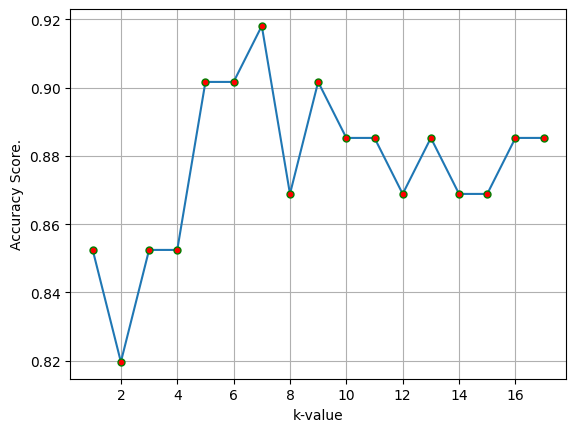

In [98]:
# without hypertuning using loop.

ac_scores_std = []
for i in range(1,18):
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_std_scaled, y_train)
    y_pred = knn.predict(X_test_std_scaled)
    ac_scores_std.append(accuracy_score(y_test, y_pred))
plt.plot(range(1,18), ac_scores_std, marker='.',ms=10,mfc='red',mec='green')
plt.grid(True)
plt.xlabel('k-value')
plt.ylabel('Accuracy Score.')

- **Here we can see highest accuracy score is when k = 7.**

## Hyper Parameter Tuning.

### Grid Search CV. 

In [99]:
k = np.arange(1,18)
p = [1,2]
hyper = {'n_neighbors': k, 'p': p}

knn =KNeighborsClassifier()
gridCV = GridSearchCV(knn, hyper, cv = 5, scoring='accuracy')
gridCV.fit(X_train_std_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                         'p': [1, 2]},
             scoring='accuracy')

In [100]:
print("Best Grid CV Score:",gridCV.best_score_)

Best Grid CV Score: 0.8384353741496599


In [101]:
gridCV.best_params_

{'n_neighbors': 5, 'p': 1}

### Randomized Search CV.

In [102]:
knn = KNeighborsClassifier()
randomCV = RandomizedSearchCV(knn, hyper, cv = 5, scoring='accuracy')
randomCV.fit(X_train_std_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                                        'p': [1, 2]},
                   scoring='accuracy')

In [103]:
print('Best Cross Validation Score:',randomCV.best_score_)

Best Cross Validation Score: 0.8306972789115645


In [104]:
randomCV.best_params_

{'p': 2, 'n_neighbors': 16}

In [105]:
roc_auc_score(y_test, y_pred) # min max scaler

0.8841594827586207

In [106]:
roc_auc_score(y_test, y_predict) # Standard scaler

0.9186422413793103

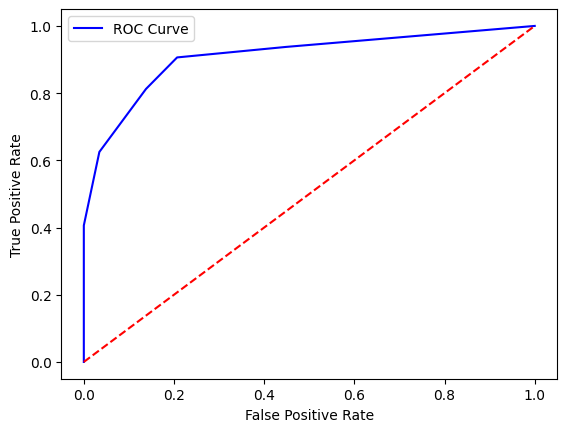

In [107]:
y_probs = norm_knn_class.predict_proba(X_test_nor_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

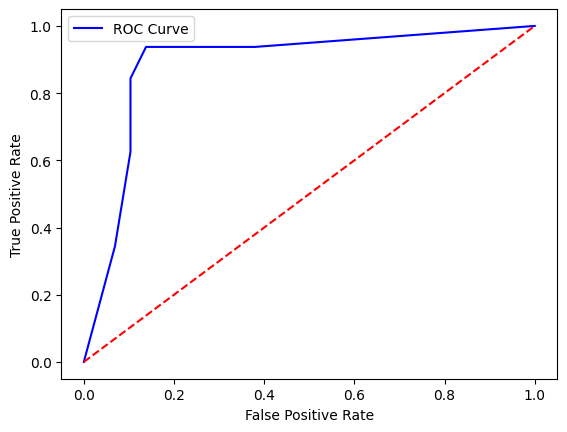

In [108]:
y_probs = norm_knn_class.predict_proba(X_test_std_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Logistic Regression Model.

In [109]:
# Model Creation.
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train_std_scaled,y_train) #training

LogisticRegression()

In [110]:
y_predt=LogReg.predict(X_test_std_scaled)
y_predt[:5]

array([0, 1, 1, 0, 1])

In [111]:
y_test[:5]

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [112]:
# Evaluation of Logistic Regression Model.

cm = confusion_matrix(y_test, y_predt)
acc = accuracy_score(y_test, y_predt)
ps = precision_score(y_test, y_predt)
cr = classification_report(y_test,y_predt)
print('Confusion matrix:\n',cm)
print('----------------------')
print('Accuracy Score:',acc)
print('----------------------')
print('Precision Score:',ps)
print('----------------------')
print('Classification Report:\n',cr)

Confusion matrix:
 [[25  4]
 [ 5 27]]
----------------------
Accuracy Score: 0.8524590163934426
----------------------
Precision Score: 0.8709677419354839
----------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [113]:
roc_auc_score(y_test, y_predt)

0.8529094827586207

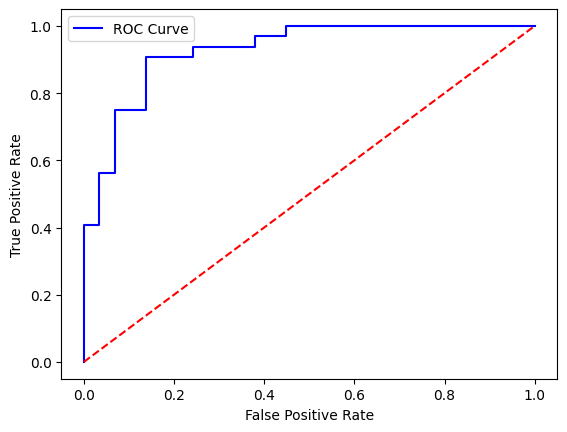

In [114]:
# ROC Curve.

y_probs = LogReg.predict_proba(X_test_std_scaled)[:, 1]  # Probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()